In [15]:
!pip uninstall scipy -y

Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Successfully uninstalled scipy-1.7.3


In [1]:
pip install scipy==1.8

^C
Note: you may need to restart the kernel to use updated packages.


In [19]:
!pip install networkx
!pip install matplotlib

     ---------------------------------------- 2.0/2.0 MB 240.7 kB/s eta 0:00:00


In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

In [2]:
#read graphs from dataset
G=nx.read_edgelist('data/facebook_combined.txt',nodetype=int)
#generate a random graph
V = nx.gnp_random_graph(4039, 0.11)

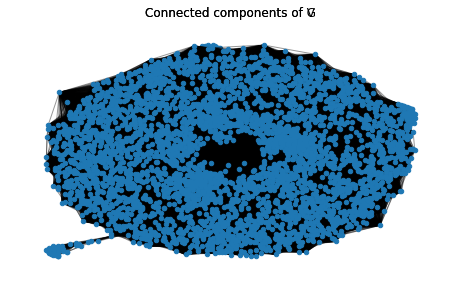

In [3]:
def plot_graph(G,name):    
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)
    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of "+name)
    ax0.set_axis_off()
    #John plot the two graphs
    
    
    
    
plot_graph(G,"G")
plot_graph(V,"V")

In [ ]:

def plotV2(title='',xlabel='',ylabel='',dictionary=None,width_par=4.0,no_keys=False):
    plt.title(title)
    #od = collections.OrderedDict(sorted(d.items()))
    if no_keys:
        plt.bar(dictionary.keys(),dictionary.values(),width=width_par)
    else:
        plt.bar(range(len(dictionary.keys())),dictionary.values(),width=width_par)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def metrics_calculation(Graph,name):
    print("-"*20)
    print("Graph "+name+"\n")
    nodelen=len(Graph.nodes())
    print("Number of vertexes")
    print(len(Graph.nodes()))
    print("-"*5)
    print("Number of Edges")
    print(len(Graph.edges()))
    print("-"*5)
    plotV2(title="Node_Degrees",dictionary=dict(Graph.degree(Graph.nodes())),
           ylabel="Degree",xlabel="Nodes",width_par=4.0)
    #od = collections.OrderedDict(sorted(d.items()))
    #plt.bar([k for k,v in sorted(G.degree(G.nodes()),key=lambda item: item[1])]
    #,[v for k,v in sorted(G.degree(G.nodes()),key=lambda item: item[1])],width=4.0,align='center') # A bar chart
    #plt.ylabel('Degree')
    #plt.show()
    #plt.title("All shortest path lengths")
    #print(dict(nx.all_pairs_shortest_path_length(G)))

    def sh_pa():
        paths={}
        for k,paths_vertex in nx.all_pairs_shortest_path_length(Graphs[i]):
            for v,path in paths_vertex.items():
                paths[str(k)+' '+str(v)]=path
        from collections import Counter
        returned=dict(Counter(paths.values()))
        del returned[0]
        return returned

    plotV2(title="All shortest path lengths",xlabel="Distances",ylabel="Node_pairs_Ammount",dictionary=sh_pa(),width_par=0.8)
    #plt.bar([k for k in sh_pa().keys()],[v for v in sh_pa().values()]) # A bar chart
    #plt.xlabel('Distances')
    #plt.ylabel('Nodes_Ammount')
    #plt.show()
    j=1
    plotV2(title="Eccentricity"+str(j),xlabel="Nodes",ylabel="Eccentricity",
           dictionary=dict(nx.eccentricity(Graph)))
    print("Radius "+str(j))#max distance
    print(nx.radius(Graph))
    print("-"*5)
    print("Diameter"+str(j))#min distance
    print(nx.diameter(Graph))
    print("-"*5)
    j+=1
    plotV2(title="Closseness_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.closeness_centrality(Graph))
    plotV2(title="Betweness_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.betweenness_centrality(Graph))
    plotV2(title="Degree_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.degree_centrality(Graph))
    plotV2(title="Eigenvector_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.eigenvector_centrality(Graph))
    plotV2(title="Katz_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.katz_centrality_numpy(Graph))
    plotV2(title="Edge_Betweeness_Centrality",xlabel="Edges",ylabel="Centrality",
           dictionary=nx.edge_betweenness_centrality(Graphs[i]))
    plotV2(title="Clustering_Coefficient (local)",xlabel="Nodes",ylabel="Coefficient",dictionary=nx.clustering(Graph))
    print("Clustering_Coefficient (global)")
    G_help=nx.complete_graph(len(Graph.nodes()))
    print(len(Graph.edges())/len(G_help.edges()))
    print("-"*5)
    print("Average_Clustering")
    print(nx.average_clustering(Graph))
    print("-"*5)
    plotV2(title="Triangles",xlabel="Nodes",ylabel="Centrality",dictionary=nx.triangles(Graph))

In [ ]:
metrics_calculation(G,"G")

In [ ]:
metrics_calculation(V,"V")